In [ ]:
#!which python
#!python --version

#%pip show PyYaml
%pip show statsmodels

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [32]:
plt.rcParams['figure.figsize'] = (10, 7.5)

# Simulate MA(2) process

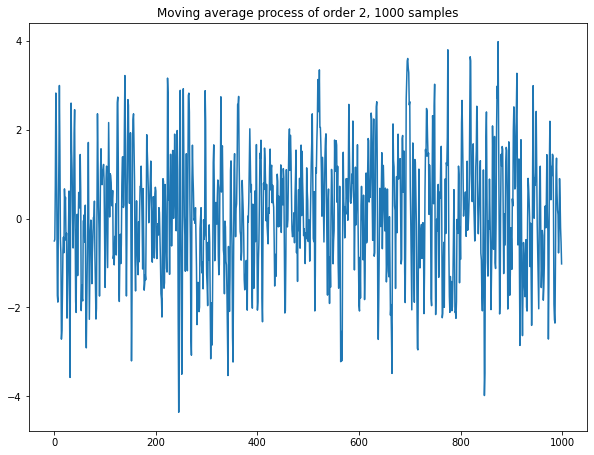

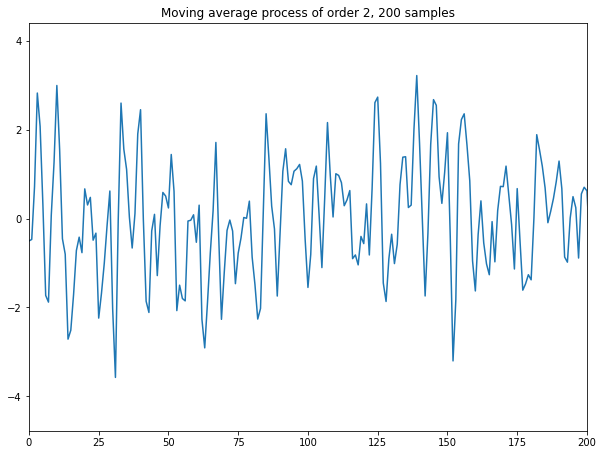

In [33]:
ma2 = np.array([1.0, 0.9, 0.3])
ar2 = np.array([1.0, 0.0, 0.0])
#print(ma2)
#print(ar2)
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
plt.plot(MA2_process)
plt.title('Moving average process of order 2, 1000 samples')
plt.show()
plt.title('Moving average process of order 2, 200 samples')
plt.plot(MA2_process)
plt.xlim(0, 200)
plt.show()

# Display the autocorrelation function for lags up to 20

### if the autocorrelation for lags > 2 is small, this is MA(2)

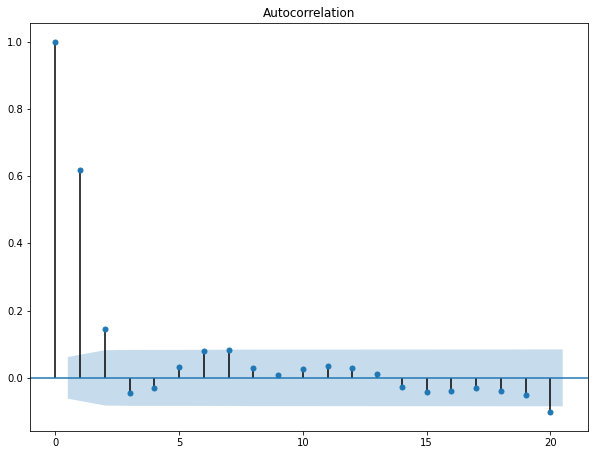

In [34]:
plot_acf(MA2_process, lags=20);

# Build ARIMA(0, 0, 2) model from the simulated MA(2) process

In [35]:
MA2_model = ARIMA(MA2_process, order=(0, 0, 2), enforce_stationarity=False).fit()
print(MA2_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1415.127
Date:                Fri, 16 Dec 2022   AIC                           2838.254
Time:                        19:41:58   BIC                           2857.873
Sample:                             0   HQIC                          2845.712
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0769      0.070      1.096      0.273      -0.061       0.214
ma.L1          0.8948      0.031     29.021      0.000       0.834       0.955
ma.L2          0.3219      0.030     10.564      0.0